<h2 style="color:#ff9600; text-align: justify;">
    Topic: 

<h3> End to End Email Processing NLP Pipeline for GISMA University Administration to Manage E-mails and Queries.

<h4 style="color:#9d36eb; text-align: justify;">
    For this module final assessment submission, 
    
    I am imagining myself as a experienced data scientist hired from our GISMA university of applice science.




**Dataset used for this assignment are synthetic dataset, generated using the help of Chat GPT.**

I am using synthetic dataset due to lack of dataset availablity and privacy concerns. The dataset will mimic the actual scenarios in the business problem context.

<h2 style="color:#ff9600; text-align: justify;">
Business Problem Statement: 

Our university GISMA, recives a vast volume of emails on daily basis from enrolled students also some enquires from  prospective students asking about courses and many other topics and conserns. Administration office faces a challenge in operating, managing these emails due to limited time and resourcees. Students are expirencing delays in responses and are impacting students in a negative and dissatisficaton way. With the implement of this NLP Pipeline will streamline to address these issue and developing own chatbot in future for repeated concerns.

This problem is important, firstly due to high volume on daily basis, secondly due to lack of resources which is leading for student dissatisfication. Addresssing this problem will help university in improved efficiency, provide data driven insights and door for new invoations adoption like chatbot ect.

<h2 style="color:#ff9600; text-align: justify;">
NLP Task:

The problems needs analysing of textual email datas. 

First task will be **Information Extraction - Named Entity Recognition (NER)**- such as Student deatils, program, dates and other entity. 

Secondly **Topic Modeling**

<h3 style="color:#BFFF00;">
Step-1 Importing the required libriaries

In [2]:
import pandas as pnd
import numpy as npy
import re as Regex
import spacy as spaCy
import random as RANDOM
import nltk
import json as JSON


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

from spacy.training import Example
from spacy.scorer import Scorer
from spacy import displacy

import warnings
warnings.filterwarnings("ignore")


<h3 style="color:#BFFF00;">
Step-2 Data exploration and cleaning

In [3]:
#Loading the dataset
gisma_nlp_df = pnd.read_csv("../../Main/M508A_Big_Data_Analytics/NLP_Synthetic_Dataset_50.csv")
gisma_nlp_df.head(5)

,Email,Text,Department,Topic,NER_truth_annotations
0,nathan.yu.nakamura@gmail.com,"Hello Student Support,\n\n This is Nath...",Student Support,Portal Access,"[{""start"":6,""end"":21,""text"":""student support"",..."
1,henry.takumi.kozlov@gisma-stu.com,"Hi Studnt Support,\n\n My name is Henry...",Student Support,Attendance Issue,"[{""start"":20,""end"":44,""text"":""name henry takum..."
2,anastasia.ann.bhatt@gisma-stu.com,"Dear Exams Board,\n\n My nam...",Exams Board,Attendance Issue,"[{""start"":24,""end"":43,""text"":""anastasia ann bh..."
3,ekaterina.masaru.suzuki@gmail.com,"Hello Admin Office,\n\n This is Ekateri...",Admin Office,Portal Access,"[{""start"":21,""end"":44,""text"":""ekaterina masaru..."
4,nikolai.lee.clark@gisma-stu.com,"HELLO PROGRAMS,\n\n THIS IS NIKOLAI LEE...",Programs,Fee Payment,"[{""start"":6,""end"":14,""text"":""programs"",""labels..."


In [4]:
#Checking the shape of tabular data and the type of data
gisma_nlp_df.info()
print()
print(gisma_nlp_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14900 entries, 0 to 14899
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Email                  14871 non-null  object
 1   Text                   13366 non-null  object
 2   Department             14900 non-null  object
 3   Topic                  14900 non-null  object
 4   NER_truth_annotations  14900 non-null  object
dtypes: object(5)
memory usage: 582.2+ KB

Email                      29
Text                     1534
Department                  0
Topic                       0
NER_truth_annotations       0
dtype: int64


<h4 style="color:#8B0000;">
    a.Handling missing values

We can observe that there some missing values in the columns ""Text"" and ""Email"". I will be droping all the null values from text column, as it is not important to us. From the email column, i have inspected the respective rows, i think those will come handy to me, so i will be replacing the null values from email column to : unknown_Email.


In [5]:
gisma_nlp_df = gisma_nlp_df.dropna(subset=["Text"])
gisma_nlp_df = gisma_nlp_df.reset_index(drop=True)

In [6]:
gisma_nlp_df["Email"] = gisma_nlp_df["Email"].replace(npy.nan, "unknown_Email")
print(gisma_nlp_df.isnull().sum())

Email                    0
Text                     0
Department               0
Topic                    0
NER_truth_annotations    0
dtype: int64


<h4 style="color:#8B0000;">
    b.Removing Noise from the dataset - Data cleaning.
    

In this section, I will clean the text data such as removing whitespace, special characters, URLs and email addresses. Also, I will lower the text, which is necessary and important because it affects the performance and quality of the model. I will be defining a function, and then I will apply it using the lambda function.

In [7]:
def basic_text_cleaning(param_text):
    param_text = Regex.sub(r"[^a-zA-Z0-9@.,\s]", "", param_text) #---> Removing special characters
    param_text = Regex.sub(r"https?://\S+|www\.\S+", "", param_text) #---> Removing Urls links
    param_text = Regex.sub(r"\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", "", param_text) #---> Removing emails
    param_text = " ".join(param_text.split()) #---> Removing whitespace
    param_text = param_text.lower() #---> lowering the text
    return param_text
    
gisma_nlp_df["Cleaned_Email_Text"] = gisma_nlp_df["Text"].apply(lambda x: basic_text_cleaning(x))
gisma_nlp_df.head(2)

,Email,Text,Department,Topic,NER_truth_annotations,Cleaned_Email_Text
0,nathan.yu.nakamura@gmail.com,"Hello Student Support,\n\n This is Nath...",Student Support,Portal Access,"[{""start"":6,""end"":21,""text"":""student support"",...","hello student support, this is nathan yu nakam..."
1,henry.takumi.kozlov@gisma-stu.com,"Hi Studnt Support,\n\n My name is Henry...",Student Support,Attendance Issue,"[{""start"":20,""end"":44,""text"":""name henry takum...","hi studnt support, my name is henry takumi koz..."


<h3 style="color:#BFFF00;">
Step-3 Information Extraction - NER (Named Entity Recognition) Task

The first task is to extract the entites information from the text, i will be using spacy blank model to build my custom model. In the business problem context of my assignment, normally when students send an email, they will be likely to mention entities like name, student ID, dates, and subjects.  Extracting such named entity information will allow the administration and support team to identify the main information of queries, and problems.

In [8]:
#gisma_nlp_df["NER_truth_annotations"] = gisma_nlp_df["ground_truth_annotations"]

In [9]:
my_NER_df = pnd.DataFrame() #--> New dataframe to work on NER Model
my_NER_df[["Cleaned_Email_Text","NER_truth_annotations"]] = gisma_nlp_df[["Cleaned_Email_Text","NER_truth_annotations"]].head(50)
my_NER_df.head(5)

,Cleaned_Email_Text,NER_truth_annotations
0,"hello student support, this is nathan yu nakam...","[{""start"":6,""end"":21,""text"":""student support"",..."
1,"hi studnt support, my name is henry takumi koz...","[{""start"":20,""end"":44,""text"":""name henry takum..."
2,"dear exams board, my name is anastasia ann bha...","[{""start"":24,""end"":43,""text"":""anastasia ann bh..."
3,"hello admin office, this is ekaterina masaru s...","[{""start"":21,""end"":44,""text"":""ekaterina masaru..."
4,"hello programs, this is nikolai lee clark from...","[{""start"":6,""end"":14,""text"":""programs"",""labels..."


<h4 style="color:#8B0000;">
    a.Removing stopwords.
    

Removing stopwords will helps the models to focus on meaningfull information and improves computational speed. I will be using NLTK corpus for removing stopwords.

In [10]:
nltk.download("stopwords")
nltk.download("punkt_tab")
nltk_stop_words = set(stopwords.words("english"))

def stopword_remover(parm_text):
    text_token_word = word_tokenize(parm_text)
    stopword_cleaned_text = [variable_word for variable_word in text_token_word if variable_word.lower() not in nltk_stop_words]
    return " ".join(stopword_cleaned_text)

my_NER_df["Processed_Cleaned_Text"] = my_NER_df["Cleaned_Email_Text"].apply(lambda x: stopword_remover(x))

my_NER_df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lohithbasavanahallianjinappa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/lohithbasavanahallianjinappa/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Cleaned_Email_Text,NER_truth_annotations,Processed_Cleaned_Text
0,"hello student support, this is nathan yu nakam...","[{""start"":6,""end"":21,""text"":""student support"",...","hello student support , nathan yu nakamura ai ..."
1,"hi studnt support, my name is henry takumi koz...","[{""start"":20,""end"":44,""text"":""name henry takum...","hi studnt support , name henry takumi kozlov ,..."
2,"dear exams board, my name is anastasia ann bha...","[{""start"":24,""end"":43,""text"":""anastasia ann bh...","dear exams board , name anastasia ann bhatt , ..."
3,"hello admin office, this is ekaterina masaru s...","[{""start"":21,""end"":44,""text"":""ekaterina masaru...","hello admin office , ekaterina masaru suzuki a..."
4,"hello programs, this is nikolai lee clark from...","[{""start"":6,""end"":14,""text"":""programs"",""labels...","hello programs , nikolai lee clark business ad..."


<h4 style="color:#8B0000;">
    b.Building a Custom NER Spcay model

I am adopting to buid my custom model, due to the main reason, that spacy pre trained model, performed very poorly(i did even checked), as they only capture only general entites like "Person", "Org", "Date". In my business problem context, it is necessary that every text contains "Student_ID", "Reference_ID", "Organizational_Unit","Course_Name", etc.

I have manually created a "Truth_Annotations" using Open source "Label Studio", to train my model and evaluate it. It was also a challaenge to me as it was time consuming. I have shown the example below.

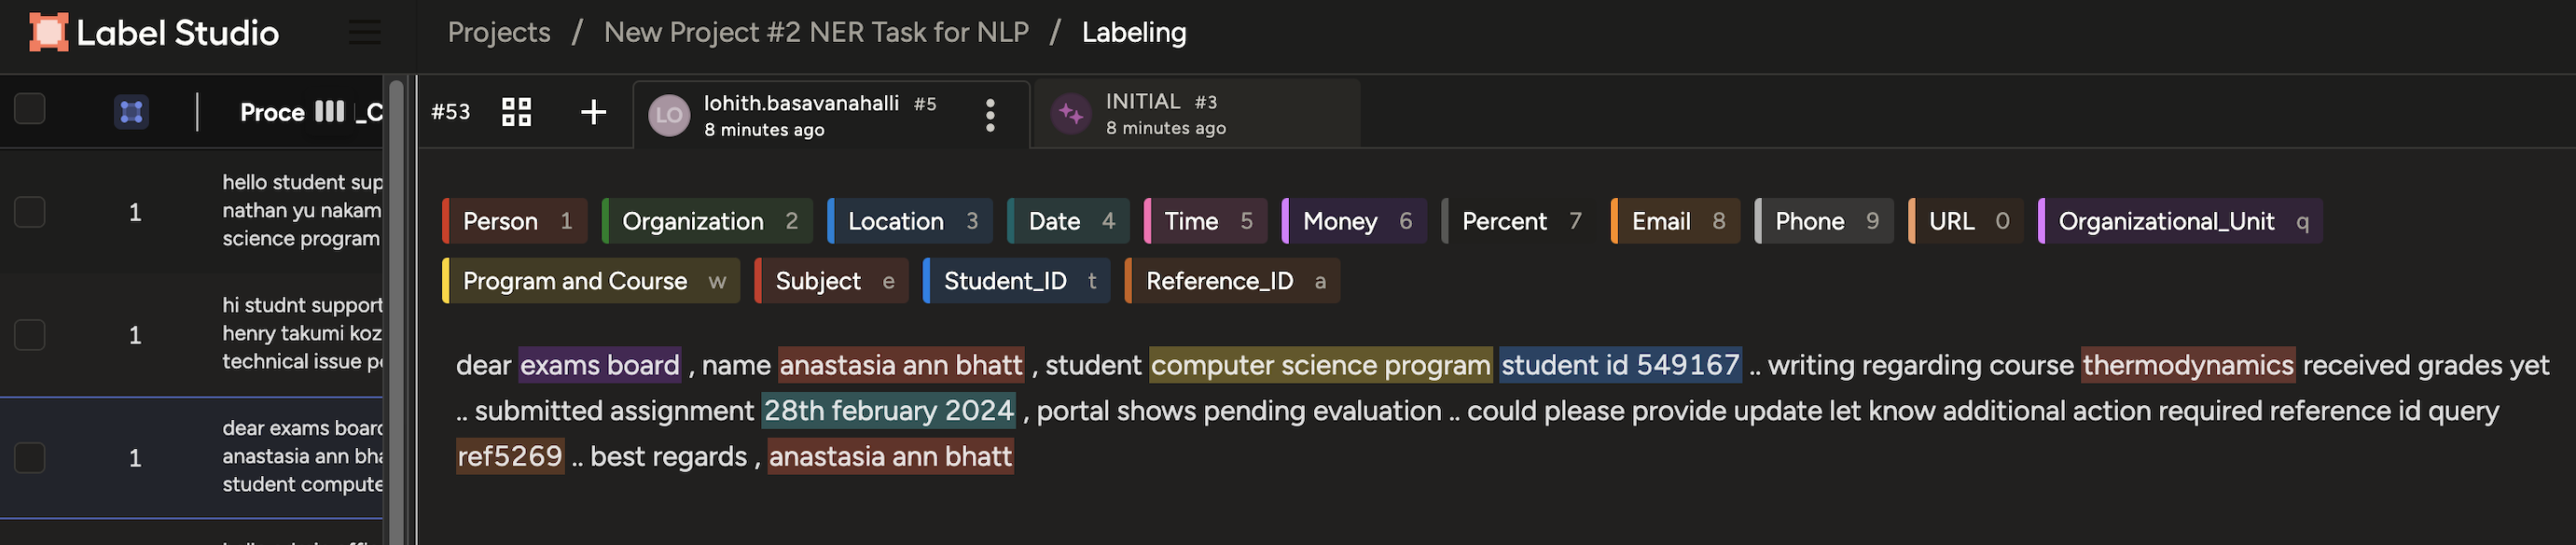

In [11]:
from IPython.display import Image, display
display(Image(filename="../../Main/M508A_Big_Data_Analytics/label_studio.png"))


<h4 style="color:#8B0000;">
**Preparing and Splitting the data**

By Default, when i load csv file, the data of annotation is loaded as JSON-like string, so i will 1st convert it to list, and then into SPACY understandable format. Later i split the data into train and test using SKLEARN.


**Note: I am not using "DOCBIN" because my Truth_Annotations data was in JSON format**



In [12]:
#Converting NER_truth_annotations into Lists using "Json"
def list_converter(parm_annotations_data):
    try:
        return JSON.loads(parm_annotations_data) 
    except JSON.JSONDecodeError:
        return []  


my_NER_df["NER_truth_annotations"] = my_NER_df["NER_truth_annotations"].apply(list_converter)

In [13]:
# Preparing the data in spaCy understandable format
NER_data = []
for _, row in my_NER_df.iterrows():
    email_text = row["Processed_Cleaned_Text"]
    truth_annotations = row["NER_truth_annotations"]
    NER_entities = []
    for each_annotations in truth_annotations:
        start = each_annotations.get("start")
        end = each_annotations.get("end")
        
        label = each_annotations.get("labels") or each_annotations.get("label")
        if label:
            if isinstance(label, list):  
                label = label[0]
            NER_entities.append((start, end, label))

    if NER_entities:
        NER_data.append((email_text, {"entities": NER_entities}))

The above code snipset will convert the json format data in to spacy understable data. 

In [14]:
# Matching Missaligned entity-Tokens
def function_for_entites_matching(Parm_data, Parm_model, debug=False):
    NER_model_Data = []
    for email_text, truth_annotations in Parm_data:
        model_DOC = Parm_model.make_doc(email_text)
        NER_matched_entities = []
        for start, end, label in truth_annotations.get("entities", []):
            var_span = model_DOC.char_span(start, end, alignment_mode="contract")
            if var_span is not None:
                NER_matched_entities.append((var_span.start_char, var_span.end_char, label))
            else:
                if debug:
                    try:
                        print(f"Mismatch '{email_text[start:end]}' in: '{email_text}'")
                    except IndexError:
                        print(f"Invalid indices: start={start}, end={end} for text: '{email_text}'")
        NER_matched_entities = overlapping_entities_remover(NER_matched_entities)
        NER_model_Data.append((email_text, {"entities": NER_matched_entities}))
        
    return NER_model_Data

The function "function_for_entites_matching" was defined to match the entity begin_char_index and end_char_index character value, if it is missmatched when we perform data cleaning. and in the below code overlapping_entities_remover function will be remove if any over laping entites are presen to ensure smoother processing.

In [15]:
# Function for removing overlapping enties
def overlapping_entities_remover(entities):
    # Sort entities by start and then by the length of the entity (end - start)
    entities = sorted(entities, key=lambda x: (x[0], x[1] - x[0]))
    non_overlapping = []
    prev_end = -1

    for start, end, label in entities:
        if start >= prev_end:  
            non_overlapping.append((start, end, label))
            prev_end = end  

    return non_overlapping

<h4 style="color:#8B0000;">
**Creating a Spacy Blank Model**

As I mentioned already, i am creating custom labeled enity, building from scratch is always easier, as it is domain model, pre trained model will fail to indentify the custom entities. In the below code, i am initalizing the blank model and adding only "ner" pipe components, as we know spacy have additional pipes, we will disale in next code snipet. Then i am defining my custom enties label_var and loading it to ner component, then i am splitting the dataset for training, validating and testing.

In [16]:
spacy_blank_model_for_english = spaCy.blank("en")
GISMA_custom_NER_model = spacy_blank_model_for_english.add_pipe("ner")

GISM_GISMA_NER_model_labels = ["Person", "Organization", "Location", "Date", "Time", "Money", 
              "Percent", "Email", "Phone", "URL", "Organizational_Unit", 
              "Program and Course", "Subject", "Student_ID", "Reference_ID",]

for var_custom_label in GISM_GISMA_NER_model_labels:
    GISMA_custom_NER_model.add_label(var_custom_label)

NER_processed_data = function_for_entites_matching(NER_data, spacy_blank_model_for_english)

# Split TRAIN_DATA into training and test sets
GISMA_NER_model_train_data, GISMA_NER_model_valTest_data = train_test_split(NER_processed_data, test_size=0.2, random_state=42)
GISMA_NER_model_val_data, GISMA_NER_model_test_data = train_test_split(GISMA_NER_model_valTest_data, test_size=0.5, random_state=42)


<h4 style="color:#8B0000;">
**Training the Custom Model**

In the below code snipet, i am building my model, starting i am disabling other components from spacy pipes, setting default spacy optimizer, later i am declaring parameter for early stopping after that i am defining validation loss calucating function, which will be called during the each epoch or itreration, Then i am training my model using validation set, setting 50 epoch, each for loop execution will capture the training loss subsequently it calls validation loss compute function, when model fails to perform after 3 iteration, it will stop the training.

In [17]:
disabling_other_components_of_model = [components for components in spacy_blank_model_for_english.pipe_names if components != "ner"]

#Setting Optimizer
GISMA_NER_model_optimizer = spacy_blank_model_for_english.begin_training()

#Setting Earystopping
ES_var_patience = 3  
Model_Best_validation_loss = float("inf")
ES_patience_counter = 0

#Validation 
def compute_validation_loss(parm_data):
    val_losses = {}
    for email_contents, ground_truth_annotations in parm_data:
        model_DOC = spacy_blank_model_for_english.make_doc(email_contents)
        representation_example = Example.from_dict(model_DOC, ground_truth_annotations)
        spacy_blank_model_for_english.update([representation_example], losses=val_losses, sgd=None, drop=0.0)
    return val_losses.get("ner", 0.0)

#Training 
with spacy_blank_model_for_english.disable_pipes(*disabling_other_components_of_model):
    
    for EPOCH in (range(50)): 
        RANDOM.shuffle(GISMA_NER_model_train_data)
        training_losses = {}
            
        for email_contents, ground_truth_annotations in (GISMA_NER_model_train_data):
            model_DOC = spacy_blank_model_for_english.make_doc(email_contents)
            representation_example = Example.from_dict(model_DOC, ground_truth_annotations)
            
            spacy_blank_model_for_english.update([representation_example],  sgd=GISMA_NER_model_optimizer, losses=training_losses, drop=0.3)
        
        # Calculate validation loss
        epoch_validation_loss = compute_validation_loss(GISMA_NER_model_val_data)
        print("Iteration / Epoch ----" + str(EPOCH+1) + "/50" + 
                 " ----Training Loss: " + str(round(training_losses["ner"], 6)) +
                  " ____Validation Loss: " + str(round(epoch_validation_loss, 6)))
        
        # Early Stopping
        if epoch_validation_loss < Model_Best_validation_loss:
            Model_Best_validation_loss = epoch_validation_loss
            ES_patience_counter = 0
        else:
            ES_patience_counter += 1
            if ES_patience_counter >= ES_var_patience:
                print("Model stopped learning")
                break

Iteration / Epoch ----1/50 ----Training Loss: 1002.882508 ____Validation Loss: 96.001166
Iteration / Epoch ----2/50 ----Training Loss: 810.415986 ____Validation Loss: 50.570872
Iteration / Epoch ----3/50 ----Training Loss: 481.530786 ____Validation Loss: 62.146688
Iteration / Epoch ----4/50 ----Training Loss: 179.977362 ____Validation Loss: 15.754444
Iteration / Epoch ----5/50 ----Training Loss: 131.976936 ____Validation Loss: 8.691446
Iteration / Epoch ----6/50 ----Training Loss: 58.590594 ____Validation Loss: 6.380293
Iteration / Epoch ----7/50 ----Training Loss: 85.43583 ____Validation Loss: 5.985836
Iteration / Epoch ----8/50 ----Training Loss: 44.331267 ____Validation Loss: 6.014447
Iteration / Epoch ----9/50 ----Training Loss: 50.791452 ____Validation Loss: 7.57217
Iteration / Epoch ----10/50 ----Training Loss: 49.529734 ____Validation Loss: 5.4205
Iteration / Epoch ----11/50 ----Training Loss: 42.229958 ____Validation Loss: 11.060653
Iteration / Epoch ----12/50 ----Training Loss

<h4 style="color:#8B0000;">
**Evaluating the Custom NER Model**

In [18]:
def Model_Evaluator(trained_model, testing_dataset):
    metrics = Scorer()
    each_sample = []
    for email_contents, ground_truth_annotations in testing_dataset:
        model_DOC = trained_model(email_contents)  
        representation_example = Example.from_dict(model_DOC, ground_truth_annotations)
        each_sample.append(representation_example)
    metrics = metrics.score(each_sample)
    return metrics


output_test = Model_Evaluator(spacy_blank_model_for_english, GISMA_NER_model_test_data)

print("Metrics of custom NER model:")
print(f'Precision: {output_test["ents_p"]:.2f}')
print(f'Recall: {output_test["ents_r"]:.2f}')
print(f'F1 Score: {output_test["ents_f"]:.2f}')

Metrics of custom NER model:
Precision: 0.90
Recall: 0.95
F1 Score: 0.92


This custom NER Model has evaluated on test set, and it have over all good performance with high recall, strong F1 Score and solid Precision. It has identified most of entities but there is chance of predicting extra or incorrect custom entites.

<h4 style="color:#8B0000;">
**Testing the Custom NER Model on Unseen Data**

In [19]:
sample = """
Dear Registry,

     
        My name is Lohith Anjinappa,  with Student Id:  GH1033599, and currently pursing Masters in Data science and AI program.
        I am writing this email to enquire regarding the course Method of Prediction, for which I have not received my grades yet. 
        I have submitted my assignment on "19th December 2024", and the portal shows "Pending Evaluation." 

        Please could you please provide an update or let me know if additional action is required? 
        My Reference ID for this query is REF-8358.

        Best regards,
        Lohith
        (GH 1033509)
"""
sample = basic_text_cleaning(sample)
sample = stopword_remover(sample)
NER_trained_model = spacy_blank_model_for_english(sample)
displacy.render(NER_trained_model, style="ent", jupyter=True)


The Model performed, well on unseen data also, it correctly predicted all the entities, but it prediced another entity extra as i can observe data science ai  is one entity, also it is labelled data science as subject, if we can fine tune more, model can be deployed.

<h3 style="color:#BFFF00;">
Step-4 Topic Modeling Task

The next task is to extract the topic or theme of the text, i will be using LDA (Latent Dirichlet Allocation) model. In the business problem context of my assignment, normally when students send an email, there will be queires or questions on diverse topic, such as accademic quires, general quires, payment quires ect. Gaining these topic informations will allow the administration and support team to channel the information of queries, and problems to corresponding personal or team for quicker resolve.

In [20]:
#Setting up the dataframe for Topic modeling 
TM_df = pnd.DataFrame() #--> New dataframe to work on Topic Modeling Task
TM_df["Processed_Cleaned_Text"] = gisma_nlp_df["Cleaned_Email_Text"]

<h4 style="color:#8B0000;">
**Lemmatizing and Vectorising the Text usking NLTK and Sci Kit Learn-Tfidf respectively**

In [21]:
def Lemmatize_and_stopword_remover(parm_text):
    text_lemmatizer = WordNetLemmatizer()
    text_token_word = word_tokenize(parm_text)
    stopword_cleaned_text = [text_lemmatizer.lemmatize(variable_word) for variable_word in text_token_word if variable_word.lower() not in nltk_stop_words]
    return " ".join(stopword_cleaned_text)

TM_df["Processed_Cleaned_Text"] = TM_df["Processed_Cleaned_Text"].apply(lambda x: Lemmatize_and_stopword_remover(x))

TM_var_vect = TfidfVectorizer(ngram_range=(1,2),max_features=500) 
TM_x = TM_var_vect.fit_transform(TM_df["Processed_Cleaned_Text"])
print("TF-IDF Matrix Shape:", TM_x.shape)


TF-IDF Matrix Shape: (13366, 500)


The above code will lemmatize the text data and vectorize it, i have experimented with uni gram and bigram"s and the evaluation result are below.

<h4 style="color:#8B0000;">
**Applying LDA(LatentDirichletAllocation)**

LDA is widely used and well knowned algorithm for the topic modeling, I am also using LDA as it is easy to implement for large datasets.

In [22]:
TM_lda = LatentDirichletAllocation(n_components=3 , max_iter=100, random_state=42)  
TM_lda.fit(TM_x)

No_of_topics = 10
for count, var_topic in enumerate(TM_lda.components_):
    model_words = [TM_var_vect.get_feature_names_out()[count] for count in var_topic.argsort()[-No_of_topics:]]
    print(f"Topic {count + 1}: {', '.join(model_words)}")

Topic 1: portal show, received, regarding, best regard, best, 2024, query, id, student, payment
Topic 2: supporting, supporting document, indicates, indicates absence, appear final, critical, review correct, april, attendance, record
Topic 3: portal accessing, please resolve, technical, technical issue, planning preparation, planning, hi, timetable, issue, error


The above code will apply LDA on the complete dataset and will extract top 3 bi-gram topics. And the these alogrith has been evaluated using coherence score using gensim module and below code snipset.

In [26]:
TM_text_tokens = [row_text.split() for row_text in TM_df["Processed_Cleaned_Text"]]

gensim_dict = Dictionary(TM_text_tokens)
gensim_corpus = [gensim_dict.doc2bow(row_text) for row_text in TM_text_tokens]

gensim_model_lda = LdaModel(corpus=gensim_corpus, id2word=gensim_dict, num_topics=3, passes=10)

gensim_coherence_model = CoherenceModel(model=gensim_model_lda, texts=TM_text_tokens, dictionary=gensim_dict, coherence="c_v")
TM_coherence_score = gensim_coherence_model.get_coherence()
print(f"Coherence Score of the LDA model: {TM_coherence_score}")

Coherence Score of the LDA model: 0.6695407537007653


**Coherence Scores with different configurations- For Top 5 Words**

| **Coherence Score** | **Vectorization Method**         |
|---------------------|----------------------------------|
| 0.6167              | Bigram + TF-IDF Vectorizer       |
| 0.5431              | Unigram + TF-IDF Vectorizer      |
| 0.5541              | Bigram + CountVectorizer         |
| 0.5978              | Unigram + CountVectorizer        |


<h3 style="color:#BFFF00;">
Conclusion

To conclude, the proposed the propposed "Name Entity Recognition" using Custom built spacy modele to extract student information entites, from unstructured text. The model has achived presision of 90 percentage and 95% of recall, which will be crucial in addressing business problem context. And the proposed "Topic Modeling" using LDA to identify the latent theme or topics in the data. These model can be handy for providing actionable insights. Together NER and TM offers a solid foundation to GISMA'S automating email business problem, These analysis along with Text classification model and some fine tuning it ready for operational deployment. 

